In [10]:
var openDigger = require('../src/open_digger');

### 查看数据库

In [11]:
var query = openDigger.driver.clickhouse.query;
query(    
    `SHOW DATABASES`
).then(
    res=>{  console.log(res); }
)

[ { name: 'default' }, { name: 'github_log' }, { name: 'system' } ]


### 查看表

In [12]:
var query = openDigger.driver.clickhouse.query;
query( `SHOW TABLES from github_log `).then(res=>{    console.log(res);})

[ { name: 'events' } ]


In [ ]:
// 查看一些数据
var limit = 10;
query(    
    `
    SELECT *
    FROM github_log.events  
    WHERE repo_name = 'facebook/react-native'
    LIMIT ${limit}
    `
)
.then(
    res=>{console.log(res);}
    );

### 1. 每月新增star和fork数

┌─────────┬───────────┬─────────┬─────────┐
│ (index) │     m     │ starCnt │ forkCnt │
├─────────┼───────────┼─────────┼─────────┤
│    0    │ '2015-03' │ '9927'  │  '868'  │
│    1    │ '2015-04' │ '3125'  │  '624'  │
│    2    │ '2015-05' │ '1172'  │  '304'  │
│    3    │ '2015-06' │  '993'  │  '230'  │
│    4    │ '2015-07' │  '945'  │  '253'  │
│    5    │ '2015-08' │  '912'  │  '214'  │
│    6    │ '2015-09' │ '3155'  │  '679'  │
│    7    │ '2015-10' │ '1792'  │  '527'  │
│    8    │ '2015-11' │ '1568'  │  '502'  │
│    9    │ '2015-12' │ '1748'  │  '526'  │
│   10    │ '2016-01' │ '1984'  │  '633'  │
│   11    │ '2016-02' │ '1481'  │  '524'  │
│   12    │ '2016-03' │ '1951'  │  '640'  │
│   13    │ '2016-04' │ '2094'  │  '665'  │
│   14    │ '2016-05' │ '1593'  │  '600'  │
│   15    │ '2016-06' │ '1527'  │  '590'  │
│   16    │ '2016-07' │ '1598'  │  '632'  │
│   17    │ '2016-08' │ '1504'  │  '556'  │
│   18    │ '2016-09' │ '1557'  │  '530'  │
│   19    │ '2016-10' │ '1577'  

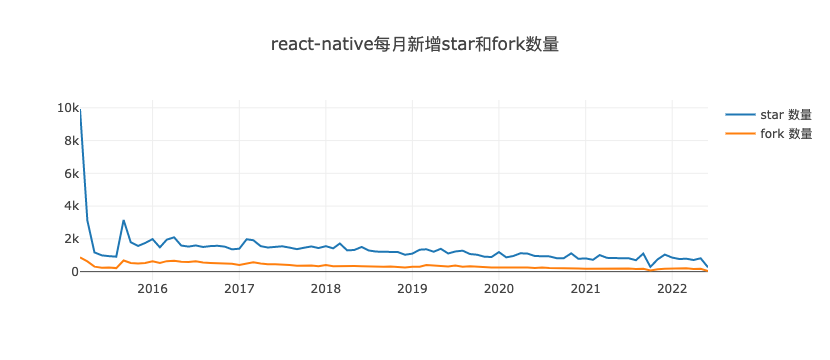

In [13]:
query(
    `
    select formatDateTime(created_at, '%Y-%m') as m, 
    count(case when repo_name = 'facebook/react-native' and type='WatchEvent' then 1 else null end)  as starCnt, 
    count(case when repo_name = 'facebook/react-native' and type='ForkEvent' then 1 else null end) as forkCnt
    from github_log.events
    where repo_name = 'facebook/react-native'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    ` 
).then(
    data => {
        console.table(data)
        openDigger.render.plotly([
        {y: data.map(d => d.starCnt), x: data.map(d => d.m), mode: 'scatter', name: 'star 数量'},
        {y: data.map(d => d.forkCnt), x: data.map(d => d.m), mode: 'scatter', name: 'fork 数量'}
    ],{title: `react-native每月新增star和fork数量`}); 
    }
     
)

### 2. 每月打开和关闭的issue

┌─────────┬───────────┬─────────┬──────────┐
│ (index) │     m     │ openCnt │ closeCnt │
├─────────┼───────────┼─────────┼──────────┤
│    0    │ '2015-03' │  '209'  │   '82'   │
│    1    │ '2015-04' │  '334'  │  '237'   │
│    2    │ '2015-05' │  '263'  │  '357'   │
│    3    │ '2015-06' │  '245'  │  '134'   │
│    4    │ '2015-07' │  '247'  │  '189'   │
│    5    │ '2015-08' │  '217'  │  '136'   │
│    6    │ '2015-09' │  '444'  │  '359'   │
│    7    │ '2015-10' │  '461'  │  '295'   │
│    8    │ '2015-11' │  '465'  │  '306'   │
│    9    │ '2015-12' │  '398'  │  '365'   │
│   10    │ '2016-01' │  '367'  │  '373'   │
│   11    │ '2016-02' │  '296'  │  '192'   │
│   12    │ '2016-03' │  '305'  │  '614'   │
│   13    │ '2016-04' │  '285'  │  '384'   │
│   14    │ '2016-05' │  '324'  │  '188'   │
│   15    │ '2016-06' │  '349'  │  '201'   │
│   16    │ '2016-07' │  '365'  │  '371'   │
│   17    │ '2016-08' │  '355'  │  '198'   │
│   18    │ '2016-09' │  '311'  │  '173'   │
│   19    

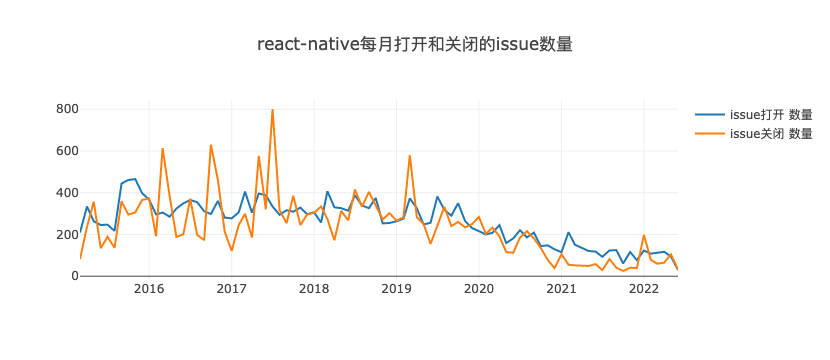

In [14]:
query(
`
    select formatDateTime(created_at, '%Y-%m') as m, 
    count(case when repo_name = 'facebook/react-native' and type='IssuesEvent' and action in ['opened', 'reopened'] then 1 else null end) as openCnt,
    count(case when repo_name = 'facebook/react-native' and type='IssuesEvent' and action='closed' then 1 else null end) as closeCnt
    from github_log.events
    where repo_name = 'facebook/react-native'    
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
`
).then(
    data => {
        console.table(data)
        openDigger.render.plotly([
        {y: data.map(d => d.openCnt), x: data.map(d => d.m), mode: 'scatter', name: 'issue打开 数量'},
        {y: data.map(d => d.closeCnt), x: data.map(d => d.m), mode: 'scatter', name: 'issue关闭 数量'}
    ],{title: `react-native每月打开和关闭的issue数量`}); 
    }
)

### 3. 每月打开PR和合入PR的个数

┌─────────┬───────────┬─────────┬──────────┐
│ (index) │     m     │ openCnt │ mergeCnt │
├─────────┼───────────┼─────────┼──────────┤
│    0    │ '2015-03' │  '143'  │   '40'   │
│    1    │ '2015-04' │  '206'  │   '79'   │
│    2    │ '2015-05' │  '140'  │   '36'   │
│    3    │ '2015-06' │  '119'  │   '32'   │
│    4    │ '2015-07' │  '134'  │   '28'   │
│    5    │ '2015-08' │  '107'  │   '28'   │
│    6    │ '2015-09' │  '221'  │   '68'   │
│    7    │ '2015-10' │  '205'  │   '73'   │
│    8    │ '2015-11' │  '183'  │   '46'   │
│    9    │ '2015-12' │  '234'  │   '64'   │
│   10    │ '2016-01' │  '226'  │   '35'   │
│   11    │ '2016-02' │  '278'  │   '9'    │
│   12    │ '2016-03' │  '249'  │   '2'    │
│   13    │ '2016-04' │  '288'  │   '0'    │
│   14    │ '2016-05' │  '236'  │   '1'    │
│   15    │ '2016-06' │  '308'  │   '3'    │
│   16    │ '2016-07' │  '247'  │   '4'    │
│   17    │ '2016-08' │  '232'  │   '5'    │
│   18    │ '2016-09' │  '194'  │   '0'    │
│   19    

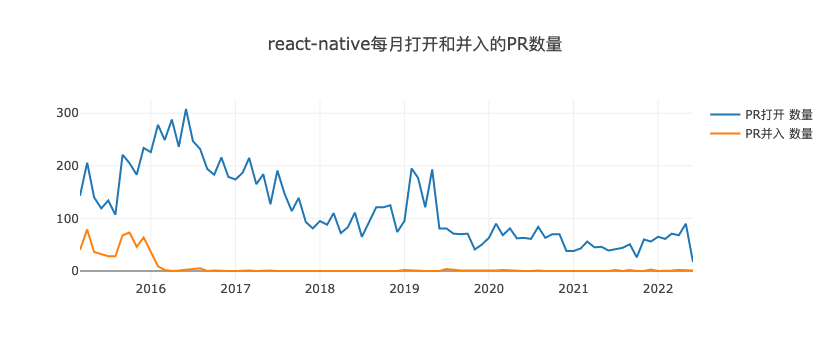

In [15]:
query(
`
    select formatDateTime(created_at, '%Y-%m') as m, 
    count(case when repo_name = 'facebook/react-native' and type='PullRequestEvent' and action= 'opened' then 1 else null end) as openCnt,
    count(case when repo_name = 'facebook/react-native' and type='PullRequestEvent' and pull_merged=1 then 1 else null end) as mergeCnt
    from github_log.events
    where repo_name = 'facebook/react-native'    
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
`
).then(
    data => {
        console.table(data)
        openDigger.render.plotly([
        {y: data.map(d => d.openCnt), x: data.map(d => d.m), mode: 'scatter', name: 'PR打开 数量'},
        {y: data.map(d => d.mergeCnt), x: data.map(d => d.m), mode: 'scatter', name: 'PR并入 数量'}
    ],{title: `react-native每月打开和并入的PR数量`}); 
    }
)

### 4. 每月在仓库中活跃的不同开发者总数

┌─────────┬───────────┬────────┐
│ (index) │     m     │  cnt   │
├─────────┼───────────┼────────┤
│    0    │ '2015-03' │ '350'  │
│    1    │ '2015-04' │ '471'  │
│    2    │ '2015-05' │ '322'  │
│    3    │ '2015-06' │ '321'  │
│    4    │ '2015-07' │ '352'  │
│    5    │ '2015-08' │ '376'  │
│    6    │ '2015-09' │ '717'  │
│    7    │ '2015-10' │ '754'  │
│    8    │ '2015-11' │ '876'  │
│    9    │ '2015-12' │ '796'  │
│   10    │ '2016-01' │ '813'  │
│   11    │ '2016-02' │ '832'  │
│   12    │ '2016-03' │ '952'  │
│   13    │ '2016-04' │ '780'  │
│   14    │ '2016-05' │ '907'  │
│   15    │ '2016-06' │ '923'  │
│   16    │ '2016-07' │ '1067' │
│   17    │ '2016-08' │ '1051' │
│   18    │ '2016-09' │ '1049' │
│   19    │ '2016-10' │ '1010' │
│   20    │ '2016-11' │ '1074' │
│   21    │ '2016-12' │ '1040' │
│   22    │ '2017-01' │ '1025' │
│   23    │ '2017-02' │ '1115' │
│   24    │ '2017-03' │ '1494' │
│   25    │ '2017-04' │ '1178' │
│   26    │ '2017-05' │ '1447' │
│   27    

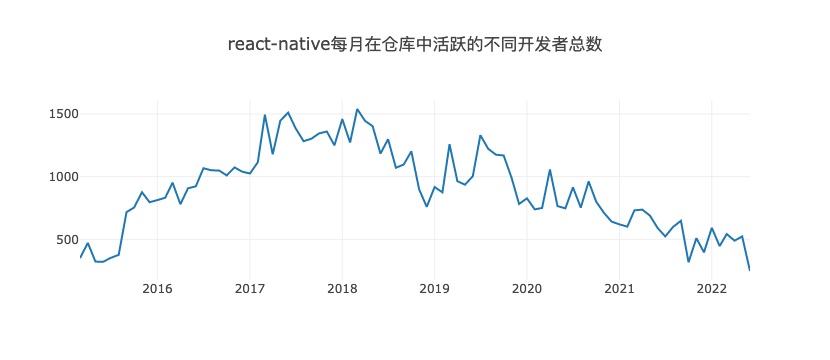

In [16]:
query(
`
    select formatDateTime(created_at, '%Y-%m') as m, count(distinct actor_id) as cnt
    from github_log.events 
    where repo_name = 'facebook/react-native' 
    and type in ['IssueCommentEvent', 'IssuesEvent', 'PullRequestEvent', 'PullRequestReviewCommentEvent']
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
`
).then(
    data => {
        console.table(data)
        openDigger.render.plotly([
        {y: data.map(d => d.cnt), x: data.map(d => d.m), mode: 'scatter', name: '开发者活跃 数量'},
    ],{title: `react-native每月在仓库中活跃的不同开发者总数`}); 
    }
)

### 5. issue从打开到关闭的平均时长和中位数（单位：天）

In [70]:
query(
`
    select 
    avg(round((issue_closed_at - issue_created_at)/(24*60*60), 2)) as avgDuration,
    median(round((issue_closed_at - issue_created_at)/(24*60*60), 2)) as midDuration
    from github_log.events
    where repo_name = 'facebook/react-native'
    and type = 'IssuesEvent'
    and action = 'closed'
`
).then(
    data => {
        console.log("issue从打开到关闭的平均时长: ", data[0].avgDuration, "(天)")
        console.log("issue从打开到关闭时长中位数: ", data[0].midDuration, "(天)")
    }
)

issue从打开到关闭的平均时长:  66.32908424555292 (天)
issue从打开到关闭时长中位数:  7.075 (天)


### 6. PR从打开到合入的平均时长和中位数（单位：天）

In [81]:
query(
`
    select 
    avg(round((issue_closed_at - issue_created_at)/(24*60*60), 2)) as avgDuration,
    median(round((issue_closed_at - issue_created_at)/(24*60*60), 2)) as midDuration
    from github_log.events
    where repo_name = 'facebook/react-native'
     and type = 'PullRequestEvent'
    and pull_merged = 1
`
).then(
    data => {
        console.log("PR从打开到关闭的平均时长: ", data[0].avgDuration, "(天)")
        console.log("PR从打开到关闭时长中位数: ", data[0].midDuration, "(天)")
    }
)

issue从打开到关闭的平均时长:  2.613344481605346 (天)
issue从打开到关闭时长中位数:  0.08499999999999999 (天)


### 7. issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [106]:
query(
`
    select 
    avg(time) as avgTime, 
    median(time) as midTime
    from (
    select min(issue_comment_created_at - issue_created_at)/(24*60*60) as time
    from github_log.events
    where repo_name = 'facebook/react-native'
    and type = 'IssueCommentEvent'
    and issue_comment_id != '0'
    group by issue_id
    )
`
).then(
    data => {
        console.log("issue和PR从打开到第一次有人回复（非本人回复）的平均时长（单位：天: ", data[0].avgTime)
        console.log("issue和PR从打开到第一次有人回复（非本人回复）的中位数（单位：天: ", data[0].midTime)
    }
)

issue和PR从打开到第一次有人回复（非本人回复）的平均时长（单位：天:  11.64617898895426
issue和PR从打开到第一次有人回复（非本人回复）的中位数（单位：天:  0.03490162037037037
